In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df=pd.read_csv("csv.csv")

In [82]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [83]:
df=df.iloc[:,2:]

In [84]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [85]:
df.sample(5)

,Age,EstimatedSalary,Purchased
159,32,135000,1
399,49,36000,1
148,29,61000,0
242,50,88000,1
20,45,22000,1


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

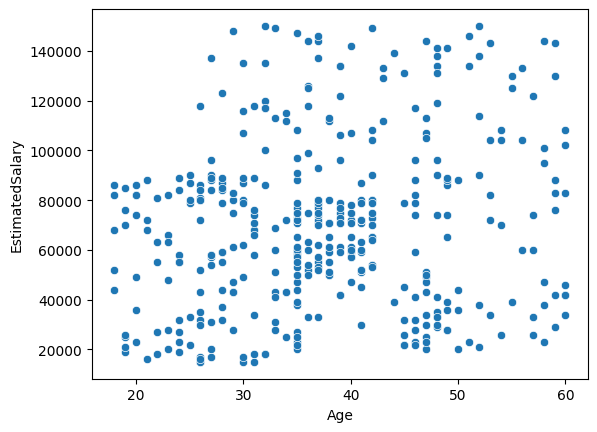

In [86]:
sns.scatterplot(df,x="Age",y="EstimatedSalary")

In [87]:
df.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


Train Test Split

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train,X_test,y_train,y_test=train_test_split(df.drop("Purchased",axis=1),df["Purchased"],test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((280, 2), (120, 2))

In [90]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [91]:
scaler.fit(X_train)

StandardScaler()

In [92]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [93]:
X_train_scaled.shape

(280, 2)

In [94]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [95]:
X_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [96]:
X_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.864286,69807.142857
std,10.218201,34641.201654
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [97]:
X_train_scaled.describe()

,Age,EstimatedSalary
count,2.800000e+02,2.800000e+02
mean,3.489272e-17,6.344132e-17
std,1.001791e+00,1.001791e+00
min,-1.947491e+00,-1.584970e+00
25%,-7.710131e-01,-7.752370e-01
50%,-8.473441e-02,2.003677e-02
75%,7.976239e-01,5.261201e-01
max,2.170181e+00,2.319101e+00


Scatter Plot

Text(0.5, 1.0, 'AfterScaling')

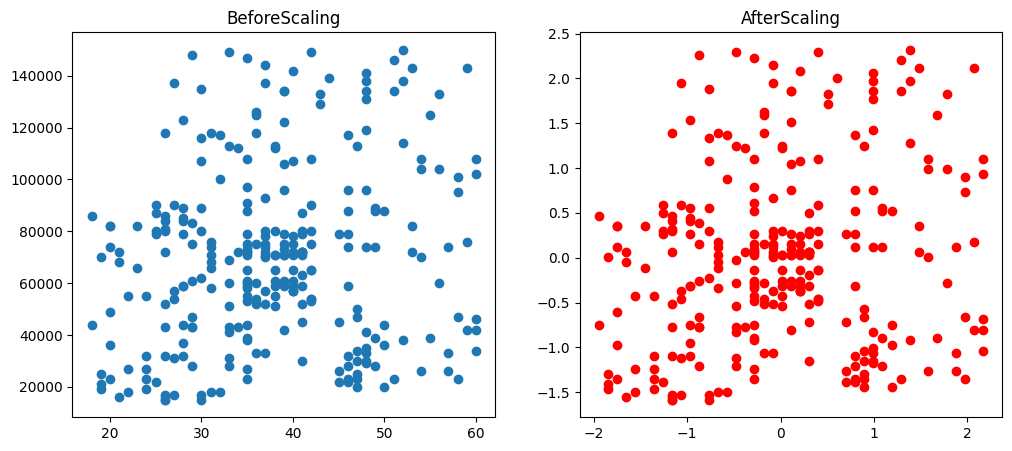

In [98]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train["Age"],X_train["EstimatedSalary"])
ax1.set_title("BeforeScaling")
ax2.scatter(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"],color="red")
ax2.set_title("AfterScaling")

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

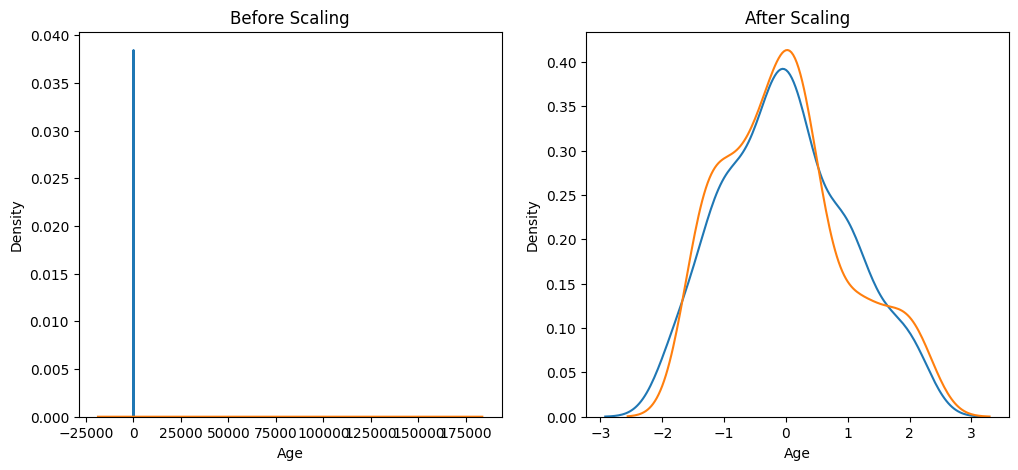

In [99]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#Before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Age"],ax=ax1)
sns.kdeplot(X_train["EstimatedSalary"],ax=ax1)
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled["Age"],ax=ax2)
sns.kdeplot(X_train_scaled["EstimatedSalary"],ax=ax2)

<Axes: xlabel='Age', ylabel='Density'>

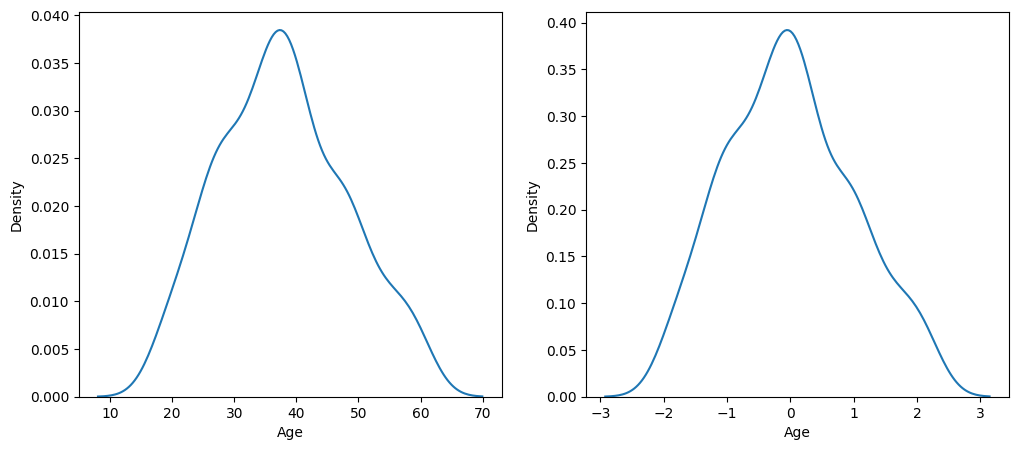

In [100]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(X_train["Age"],ax=ax1)
sns.kdeplot(X_train_scaled["Age"],ax=ax2)

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

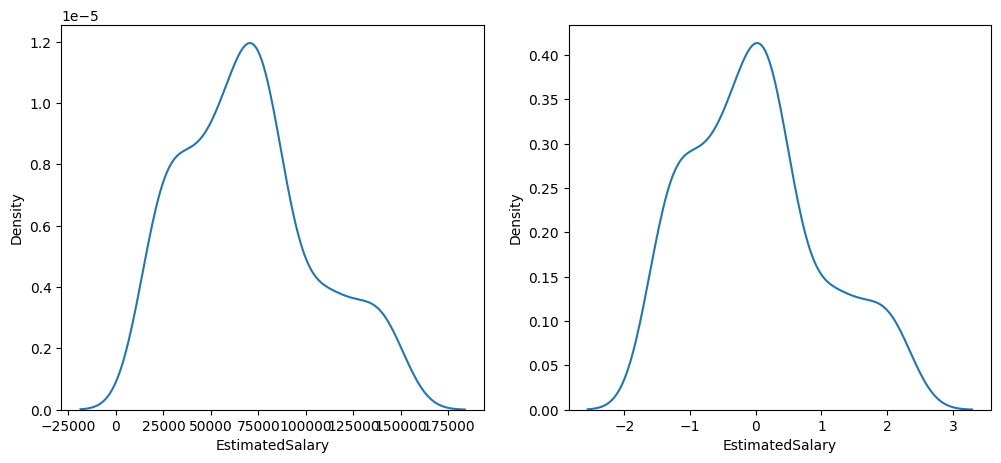

In [101]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(X_train["EstimatedSalary"],ax=ax1)
sns.kdeplot(X_train_scaled["EstimatedSalary"],ax=ax2)

In [102]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lrs=LogisticRegression()

In [110]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [103]:
lr.fit(X_train,y_train)
lrs.fit(X_train_scaled,y_train)

LogisticRegression()

In [104]:
y_pred=lr.predict(X_test)
y_pred_scaled=lrs.predict(X_test_scaled)

In [105]:
from sklearn.metrics import accuracy_score

In [108]:
accuracy_score(y_test,y_pred)

0.875

In [109]:
accuracy_score(y_test,y_pred_scaled)

0.8666666666666667